# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [65]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy.random as r
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [66]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [67]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [68]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    #ignore = ["age", "Medu", "Fedu","Mjob", "Fjob", 'reason', 'guardian','traveltime', 'studytime',
    #       'failures']
    #print(X.columns)
    #print(X.iloc[0,:])
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape)
    return X

In [69]:
X_fixed = fixingfile(X)
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)

(649, 26)


# FROM here on out the markdown split up which model. Add cells according to which mark down. Here is the order
## 1. Linear Regression
## 2. Neutral Network 
## 3. SVM

# Multiple Linear Regression

In [70]:
N = y.shape[0]
print("Number of rows:", N)

Number of rows: 649


In [71]:
X_scale = StandardScaler()
X_fit= np.array(X_scale.fit_transform(X))

In [72]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.4)

In [73]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        if y[i] >= 10:
            y_vect[i, 0] = 1
        else:
            y_vect[i, 1] = 1
    return y_vect

In [74]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
print("Testing training set shape: ",y_v_train.shape)
print("Testing testing set shape: ",y_v_test.shape)

Testing training set shape:  (389, 2)
Testing testing set shape:  (260, 2)


In [75]:
# Sigmoid activation function - depends on whether we want to use it or not
def f(z):
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    return f(z) * (1 - f(z))

In [76]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [77]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [78]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [79]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [80]:
#train NN without regularization
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l])) 
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [81]:
def train_rigde_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, hyper = 0.1):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l])) 
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l]) + hyper * W[l]
            b[l] += -alpy_testha * (1.0/N * tri_b[l])
        # complete they_test average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [82]:
def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [83]:
nn_structure = [26, 30, 2]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


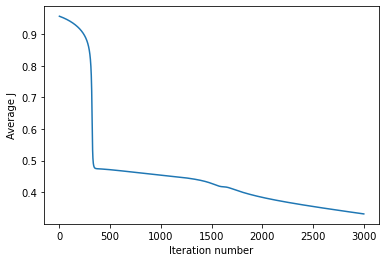

In [84]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [89]:
y_pred = predict_y(W, b, X_test, 3)
print(y_pred)
print(y_test)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[13.7 10.4  5.8 16.7 12.5 12.  13.4 13.4 11.3 10.4 16.4 15.8  7.7  4.2
  9.4 15.  10.7  9.7 11.1 10.  14.5  8.6 11.  10.3 13.1 13.5 12.1 16.
  8.3 14.4 14.7 12.4 15.   9.  13.3 14.7 10.7 10.  10.  10.4 10.3  

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

In [ ]:
nn_structure = [26, 30, 3]
    
# train the NN
W, b, avg_cost_func = train_rigde_nn(nn_structure, X_train, y_v_train, 3000)

In [ ]:
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))